In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv 
from tensorflow import constant

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image_cv(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (256, 256))
    img = img.astype(np.float32)
    img = np.expand_dims(img, axis=0)
    return img

def load_image_tf(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis,:]
    return img

In [4]:
content_path = r"D:\agnext\Agnext\OpenCv\difference_between_images\images\scanned_image (2).png"
style_path = r"D:\agnext\Agnext\OpenCv\difference_between_images\noise_pool\4.png"

content_image = load_image_tf(content_path)
style_image = load_image_tf(style_path)

In [5]:
stylized_image = model(constant(content_image), constant(style_image))

: 

: 

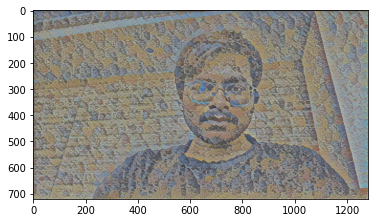

In [15]:
plt.imshow(np.squeeze(stylized_image[0]))
plt.show()

In [16]:
cv.imwrite("stylized.jpg", cv.cvtColor(np.squeeze(stylized_image)*255, cv.COLOR_BGR2RGB))

True

In [7]:
# for i in range(1,25):

#     #! image 20 gives error for some reason

#     style_path = r"D:\agnext\Agnext\OpenCv\neural_style_transfer\styles\s (" + str(i) + ").jpg"
#     # style_path = r"D:\agnext\Agnext\OpenCv\neural_style_transfer\styles\s (9).jpg"

#     content_image = load_image_tf(content_path)
#     style_image = load_image_tf(style_path)

#     stylized_image = model(constant(content_image), constant(style_image))

#     name = "stylized" + str(i) + ".jpg"

#     cv.imwrite(name, cv.cvtColor(np.squeeze(stylized_image)*255, cv.COLOR_BGR2RGB))
    